In [1]:
from datetime import date
from nsepy import get_history
import numpy as np
import scipy.linalg as la
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
#nse = pd.read_csv('/home/saran/Analytics/Project/Data/MCAP_31032020_0.csv', index_col=0)
#nse.index.name = None

In [3]:
#for name in nse['Symbol']:
#   data = get_history(symbol = name, start = date(2010,1,1), end = date(2019,12,31))
#   data.to_csv('data_{}.csv'.format(name))

In [4]:
#close = pd.DataFrame()
#for name in nse['Symbol']:
#    data = pd.read_csv('/home/saran/Analytics/Project/Data/data_{}.csv'.format(name), usecols=['Date', 'Close'])
#    close[['Date', name]] = data[['Date', 'Close']]
#    close.to_csv('closeprice.csv', index=False)

In [5]:
data = pd.read_csv('/home/saran/Analytics/Project/Codes/closeprice.csv', index_col=0)
data.index.name = None

In [6]:
data.shape

(2481, 63)

In [7]:
# remove columns with number of NaN greater than 0.3%
data = data.loc[:, data.isnull().mean() < .003]

In [8]:
data.shape

(2481, 52)

In [9]:
# price change
price = pd.DataFrame()
dt = 1
for name in data.columns:
    price[name] = [np.log(data[name][t+dt]) - np.log(data[name][t]) for t in range(len(data)-dt)]

In [10]:
price.shape

(2480, 52)

In [11]:
price.describe()

,RELIANCE,TCS,HINDUNILVR,HDFCBANK,HDFC,INFY,KOTAKBANK,BHARTIARTL,ITC,ICICIBANK,...,M&M,JSWSTEEL,MCDOWELL-N,GAIL,CIPLA,COLPAL,DLF,TORNTPHARM,PGHH,BIOCON
count,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,...,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,0.000138,0.000426,0.000800,-0.000118,-0.000042,-0.000514,0.000289,0.000136,-0.000026,-0.000198,...,-0.000304,-0.000537,-0.000318,-0.000497,0.000140,0.000305,-0.000184,0.000627,0.000764,0.000020
std,0.021562,0.021075,0.014404,0.037458,0.035647,0.029436,0.025395,0.019985,0.021960,0.037860,...,0.026566,0.051987,0.040934,0.024445,0.015558,0.019956,0.029772,0.022206,0.014282,0.033106
min,-0.698754,-0.702295,-0.055373,-1.605457,-1.577693,-0.715617,-0.701176,-0.098894,-0.706017,-1.600062,...,-0.731055,-2.311165,-1.629624,-0.719645,-0.092396,-0.717079,-0.336268,-0.682535,-0.057333,-1.084348
25%,-0.009819,-0.008012,-0.007532,-0.006561,-0.009204,-0.007488,-0.008614,-0.011457,-0.007838,-0.011186,...,-0.010218,-0.012817,-0.013210,-0.009943,-0.008581,-0.007456,-0.015938,-0.009248,-0.006939,-0.010035
50%,0.000050,0.000400,0.000179,0.000420,0.000217,0.000507,0.000818,-0.000424,0.000413,-0.000423,...,0.000420,0.000295,-0.000254,-0.000134,-0.000517,-0.000110,0.000692,0.000342,-0.000070,0.000000
75%,0.010288,0.009287,0.008519,0.007774,0.010443,0.009367,0.009963,0.010832,0.008859,0.011470,...,0.010442,0.013963,0.012455,0.009992,0.008533,0.007442,0.016726,0.010006,0.006946,0.010505
max,0.104027,0.115206,0.160264,0.085724,0.079781,0.155165,0.084269,0.099625,0.095725,0.137042,...,0.091223,0.114350,0.298074,0.094910,0.073474,0.084832,0.168736,0.095101,0.139162,0.144727


In [12]:
# normalized return
nprice = pd.DataFrame()
for name in price.columns:
    nprice[name] = [(price[name][t] - np.mean(price[name]))/np.std(price[name], ddof=1) for t in range(len(price))]

In [13]:
nprice.shape

(2480, 52)

In [14]:
nprice.describe()

,RELIANCE,TCS,HINDUNILVR,HDFCBANK,HDFC,INFY,KOTAKBANK,BHARTIARTL,ITC,ICICIBANK,...,M&M,JSWSTEEL,MCDOWELL-N,GAIL,CIPLA,COLPAL,DLF,TORNTPHARM,PGHH,BIOCON
count,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,...,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03
mean,-1.011735e-17,2.130912e-17,-2.426375e-17,6.614333e-18,-6.535990e-18,4.185720e-18,-9.703260e-18,1.351965e-17,2.001087e-17,3.021776e-18,...,8.751960e-18,6.547182e-18,3.610463e-17,-1.674288e-17,6.121895e-18,1.627842e-17,-4.588623e-18,-1.204234e-17,1.128130e-17,-1.411281e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.241243e+01,-3.334404e+01,-3.899691e+00,-4.285668e+01,-4.425768e+01,-2.429311e+01,-2.762203e+01,-4.955287e+00,-3.214911e+01,-4.225712e+01,...,-2.750717e+01,-4.444611e+01,-3.980328e+01,-2.941915e+01,-5.948028e+00,-3.594844e+01,-1.128867e+01,-3.076423e+01,-4.067972e+00,-3.275481e+01
25%,-4.617636e-01,-4.003681e-01,-5.784214e-01,-1.720032e-01,-2.570269e-01,-2.369387e-01,-3.505874e-01,-5.801034e-01,-3.557490e-01,-2.902309e-01,...,-3.731815e-01,-2.362189e-01,-3.149612e-01,-3.864100e-01,-5.605771e-01,-3.889082e-01,-5.291515e-01,-4.446788e-01,-5.393627e-01,-3.037230e-01
50%,-4.055057e-03,-1.230152e-03,-4.306846e-02,1.437933e-02,7.240876e-03,3.466480e-02,2.083688e-02,-2.801880e-02,1.999777e-02,-5.966520e-03,...,2.725647e-02,1.599970e-02,1.562848e-03,1.482672e-02,-4.224574e-02,-2.077953e-02,2.943893e-02,-1.281485e-02,-5.844106e-02,-6.101362e-04
75%,4.707117e-01,4.204587e-01,5.358855e-01,2.106949e-01,2.941178e-01,3.356434e-01,3.809624e-01,5.351964e-01,4.045921e-01,3.081639e-01,...,4.044995e-01,2.789198e-01,3.120327e-01,4.290755e-01,5.394728e-01,3.576284e-01,5.679899e-01,4.223645e-01,4.328334e-01,3.167189e-01
max,4.818058e+00,5.446310e+00,1.107053e+01,2.291672e+00,2.239252e+00,5.288632e+00,3.306928e+00,4.978250e+00,4.360284e+00,3.624911e+00,...,3.445290e+00,2.209901e+00,7.289592e+00,3.902922e+00,4.713694e+00,4.235683e+00,5.673832e+00,4.254354e+00,9.690503e+00,4.371055e+00


In [15]:
# correlation matrix
C = nprice.corr()

In [16]:
# eigenvalues and eigenvectors calculation for elements in correlation matrix
eigvals, eigvecs = la.eig(C.to_numpy())
eigvals = eigvals.real

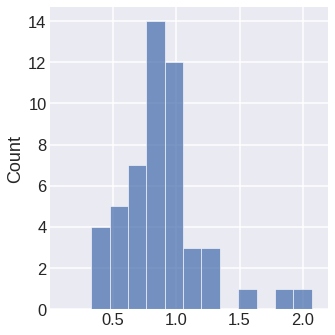

In [57]:
ax = sns.displot(eigvals)
ax.set(xlim=(None, 2.2))

In [19]:
columns = [f'column_{num}' for num in range(nprice.shape[1])]
index = [f'index_{num}' for num in range(nprice.shape[0])]
A = pd.DataFrame(np.random.normal(loc = 0, scale = 1, size = nprice.shape), columns = columns, index = index)

In [35]:
A.shape

(2480, 52)

In [36]:
A.describe()

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_42,column_43,column_44,column_45,column_46,column_47,column_48,column_49,column_50,column_51
count,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,...,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,0.001085,-0.005232,-0.020657,0.030423,0.013475,0.034453,-0.010841,0.015824,-0.012072,0.013229,...,0.007824,0.003079,0.002717,0.030085,-0.003793,0.000438,-0.012242,-0.021901,-0.008574,-0.011228
std,1.022953,0.985231,0.988095,0.996884,0.998852,0.995427,0.989305,1.005232,0.995748,0.980877,...,0.974309,1.021288,1.014366,0.977335,1.012959,0.989567,0.979002,0.997349,0.993365,0.998564
min,-3.296430,-3.819938,-3.195871,-4.456164,-3.426685,-3.635561,-3.608739,-4.259632,-3.160959,-3.707157,...,-3.388460,-3.848139,-3.503389,-3.395419,-3.412515,-3.250546,-3.740473,-3.161564,-4.005905,-3.568793
25%,-0.691090,-0.640101,-0.694215,-0.625316,-0.672384,-0.648051,-0.687791,-0.667631,-0.708187,-0.659837,...,-0.659608,-0.694620,-0.715837,-0.626836,-0.698670,-0.654212,-0.678497,-0.688887,-0.641268,-0.657181
50%,-0.022426,0.000052,-0.020568,0.026767,-0.000865,0.060032,0.000848,0.008040,-0.023180,0.000184,...,0.000353,0.037524,0.007563,0.024054,0.010038,0.019435,-0.004790,-0.021583,0.009543,0.015327
75%,0.694192,0.631336,0.623048,0.725061,0.712494,0.721091,0.673609,0.666665,0.663103,0.672118,...,0.695593,0.700276,0.683130,0.685435,0.682208,0.670965,0.641587,0.651662,0.648634,0.664327
max,4.345686,3.000375,3.748454,2.743792,3.144793,3.382258,3.009721,3.395477,3.426103,3.495354,...,3.150408,2.952026,3.678721,3.729451,3.440928,3.075527,3.263544,3.046220,3.164410,3.592750


In [20]:
# N x N random matrix whose elements are all uncorrelated
R = A.corr()

In [22]:
reigvals, reigvecs = la.eig(R.to_numpy())
reigvals = reigvals.real

In [23]:
import csv

with open("randomeigenvales.csv", "w") as f:
    csv_writer = csv.writer(f, delimiter=',')

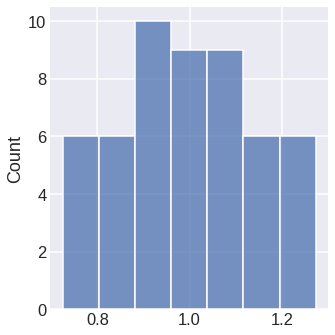

In [61]:
sns.displot(reigvals)

In [25]:
eigdata = pd.DataFrame()
eigdata['eigvals'] = eigvals
eigdata['reigvals'] = reigvals

In [26]:
eigdata.head()

,eigvals,reigvals
0,6.841963,1.273338
1,1.983730,1.269969
2,1.798420,1.236274
3,1.524316,0.724538
4,0.331767,1.222585


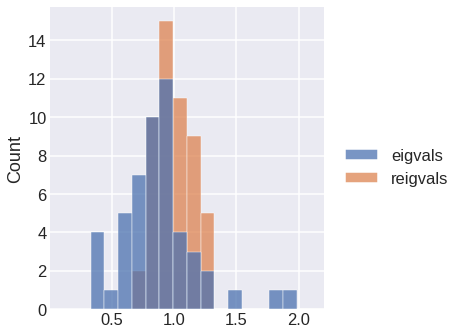

In [34]:
ax = sns.displot(eigdata)
ax.set(xlim=(None, 2.2))

In [28]:
T, N = nprice.shape
Q = T/N

print(T, N, Q)

2480 52 47.69230769230769


In [29]:
lambdaMin = 1 + (1/Q) - 2 * np.sqrt(1/Q)
lambdaMax = 1 + (1/Q) + 2 * np.sqrt(1/Q)

print(lambdaMin, lambdaMax)

print(min(reigvals), max(reigvals))

0.7313628943553105 1.3105725895156572
0.7245379976157367 1.2733376168963995


In [30]:
reigdist = [(Q/(2*np.pi)) * (np.sqrt((lambdaMax - value) * (value - lambdaMin))/value) for value in reigvals]

/home/saran/.envn/dsci/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [31]:
print(reigdist)

[0.8468177154965734, 0.8838754016258679, 1.1891901375925154, nan, 1.290741763168505, 1.3333124223961659, 1.4484118721253916, 1.5206091070947403, 1.6195022547529616, 1.6342442214197137, 1.320921392592775, 1.6927429242662517, 1.599509017173762, 1.6500937355498229, 1.7824172421280167, 1.8002099088259507, 1.780675514785007, 1.9278407453044468, 1.8068737275916913, 1.9815738757270813, 1.8723384366741798, 1.8964325638935464, 1.923769826229013, 1.9515125086957659, 1.976996630491552, 2.0742423830515935, 2.009579405722062, 2.11993509149855, 2.1519175523819247, 2.153390062541427, 2.057081458256778, 2.075884671964338, 2.2033487330747756, 2.205170782928603, 2.2100933223992247, 2.2234157560765286, 2.2341814893459784, 2.2382696013374392, 2.1136231729347617, 2.1196326157912537, 2.2439702470549383, 2.2452929355923557, 2.1493883141183883, 2.1536431439225194, 2.2434752439254404, 2.2402106471769905, 2.1807903750999866, 2.233897410540117, 2.2237515210244636, 2.2084438257751366, 2.219216621938428, 2.2124799